In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##### Load experimental data

In [2]:
experimental = np.loadtxt('../../Netlogo_NLCs-CLL/filtered_fused_9patients.csv', delimiter=",", skiprows=1)
viability_exp = experimental[:,1]
concentration_exp = experimental[:,2]
time_points = experimental[:,0]

##### Load output from simulation

In [4]:
viability_data_node1 = pd.read_csv('../data_output/Parameter_exploration/results/viability_1.csv', delimiter=",")
viability_data_node2 = pd.read_csv('../data_output/Parameter_exploration/results/viability_2.csv', delimiter=",")
viability_data_node3 = pd.read_csv('../data_output/Parameter_exploration/results/viability_3.csv', delimiter=",")
viability_data = pd.concat([viability_data_node1, viability_data_node2, viability_data_node3], axis = 1) 

concentration_data_node1 = pd.read_csv('../data_output/Parameter_exploration/results/concentration_1.csv', delimiter=",")
concentration_data_node2 = pd.read_csv('../data_output/Parameter_exploration/results/concentration_2.csv', delimiter=",")
concentration_data_node3 = pd.read_csv('../data_output/Parameter_exploration/results/concentration_3.csv', delimiter=",")
concentration_data = pd.concat([concentration_data_node1, concentration_data_node2, concentration_data_node3], axis=1)

vals = list([1e-6, 1e-4, 1e-3, 1e-2, 1e-1, 2, 3, 4, 5])
len(vals)

viability_data.shape[1]

input = {'uptake_rate_cancer': 1.0, 'secretion_rate_cancer':1.0, 'speed_cancer': 1.0, 'transformation_rate_cancer': 3e-5, 'relative_maximum_adhesion_distance_cancer': 0, 'cell_adhesion_affinity_cancer': 1,
         'speed_monocytes': 1.0, 'transformation_rate_monocytes': 95e-6, 'phagocytosis_rate_monocytes':25e-2, 'speed_macrophages': 1.0, 'phagocytosis_rate_macrophages':92e-2, 
         'attack_rate_macrophages': 5e-2, 'relative_maximum_adhesion_distance_macrophages': 0, 'cell_adhesion_affinity_macrophages': 1, 'speed_NLCs': 1.0, 'phagocytosis_rate_NLCs':4e-2, 
         'secretion_rate_apoptotic': 1.0, 'speed_apoptotic': 1.0, 'transformation_rate_apoptotic': 5e-05, 'secretion_rate_dead': 1.0}

param_names = list(input.keys())

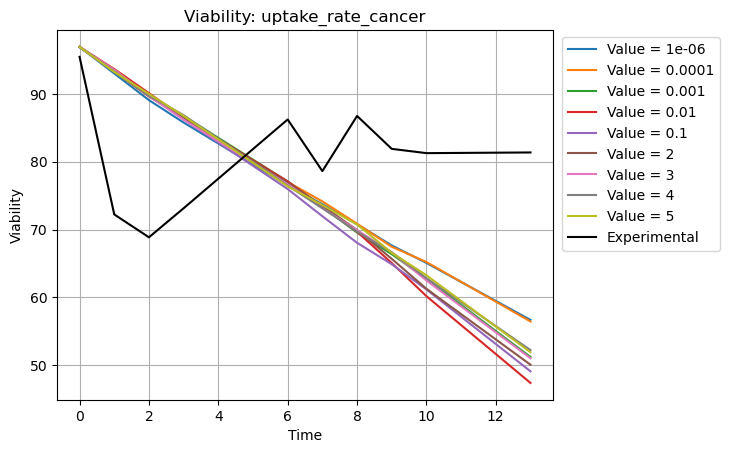

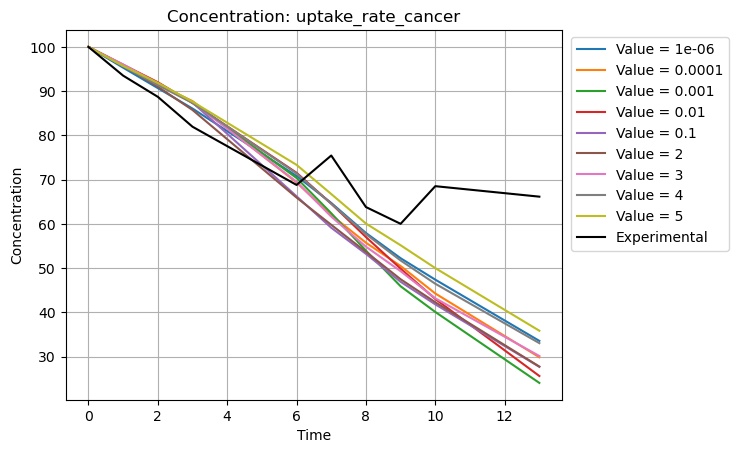

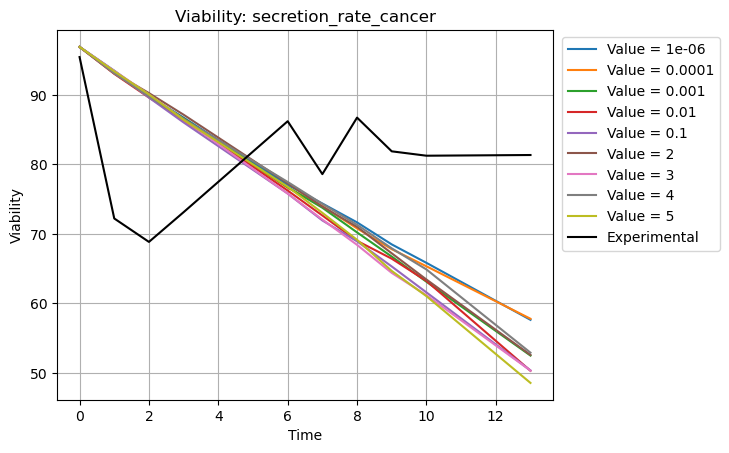

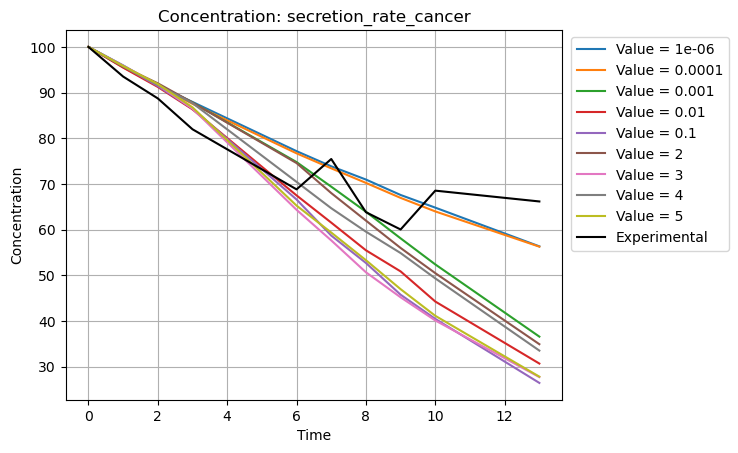

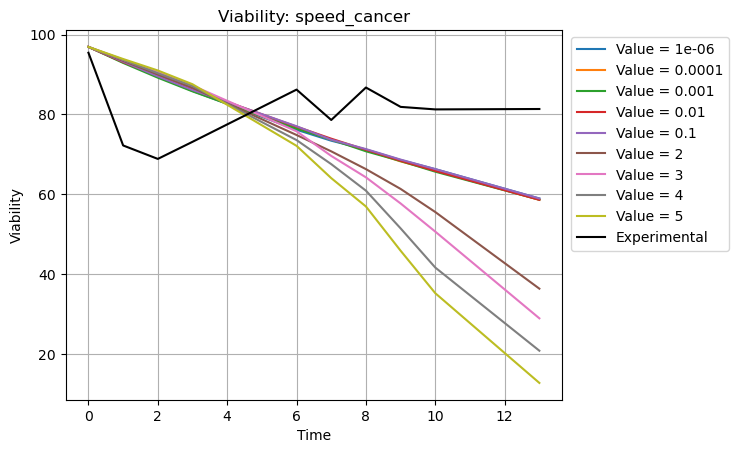

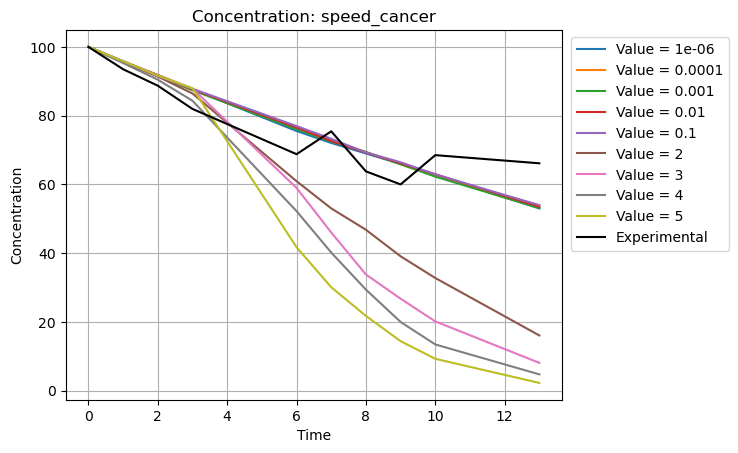

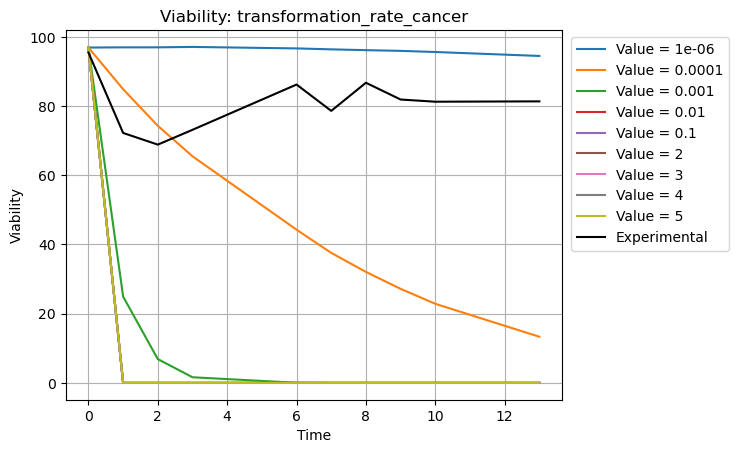

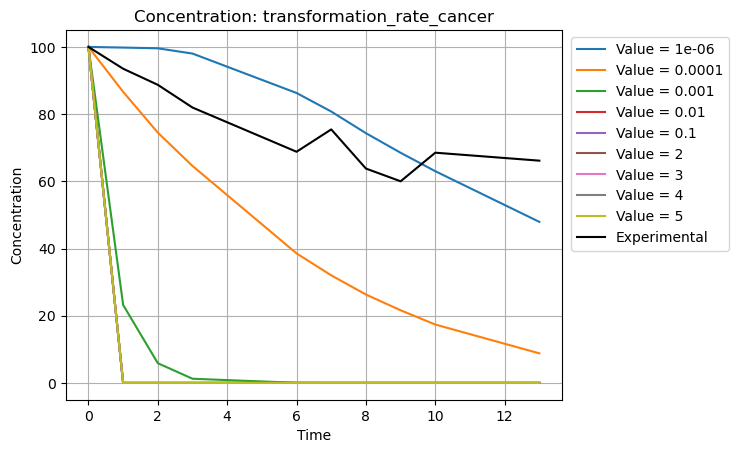

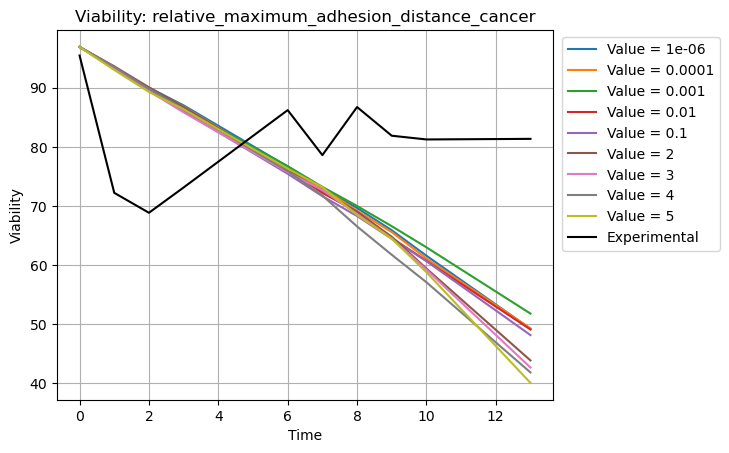

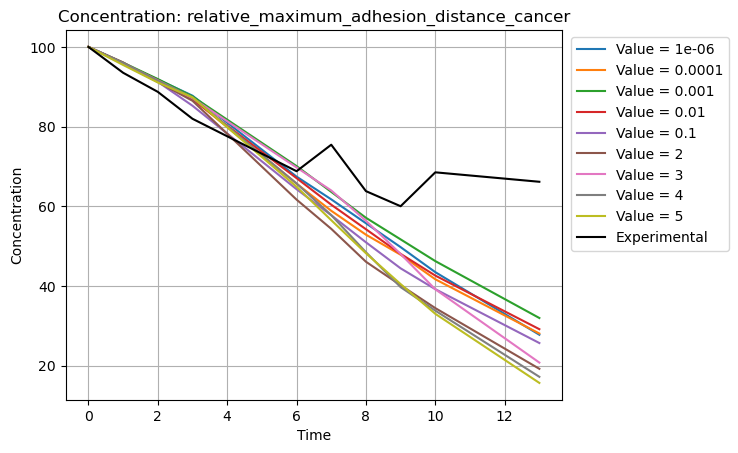

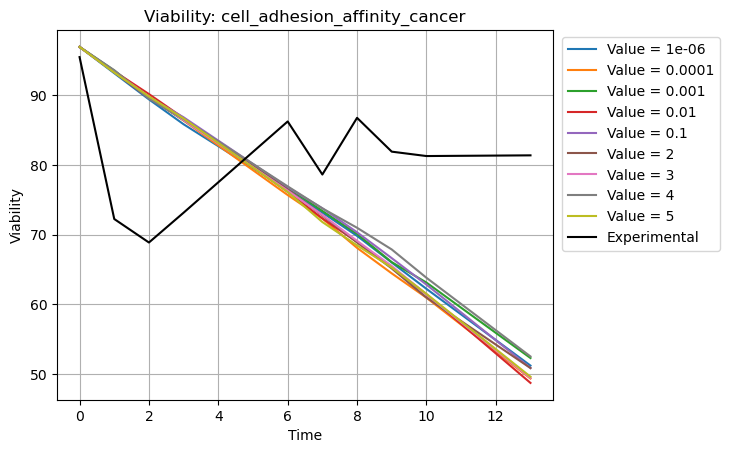

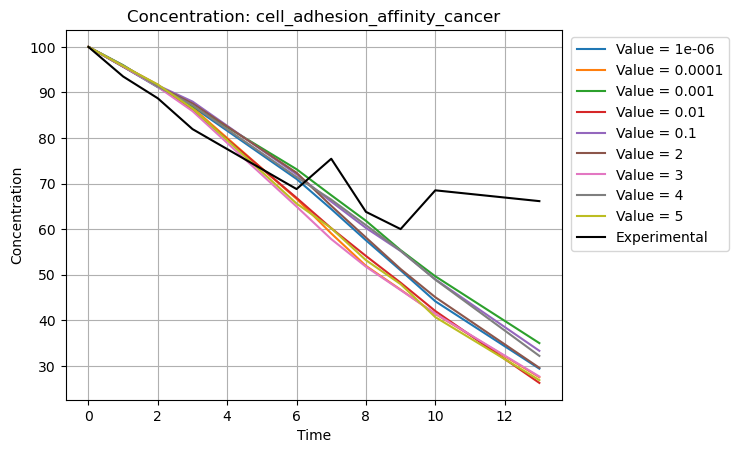

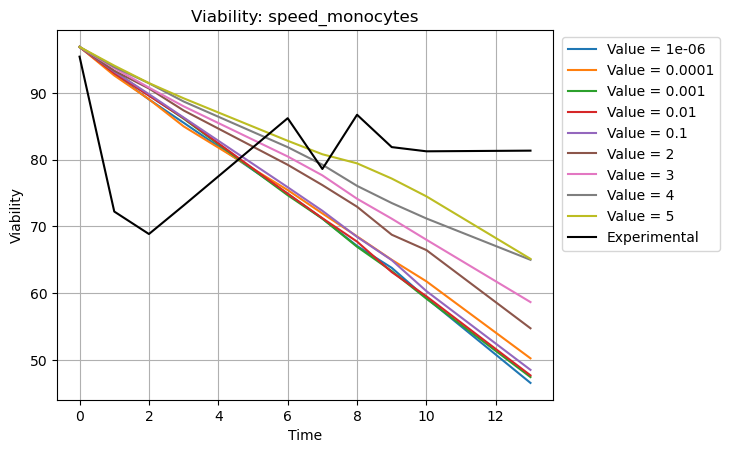

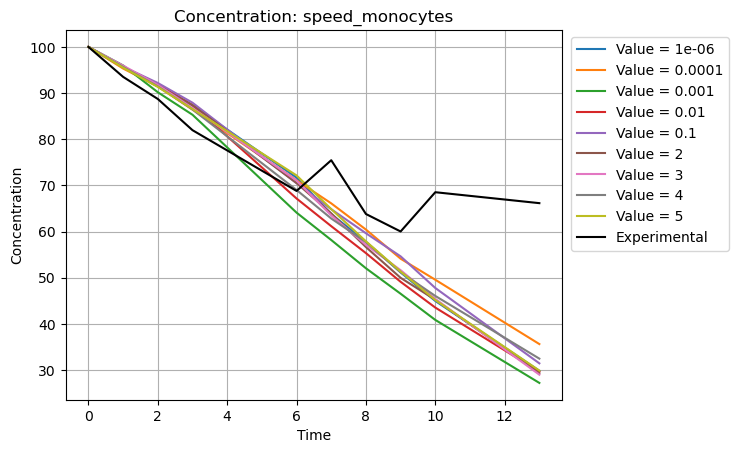

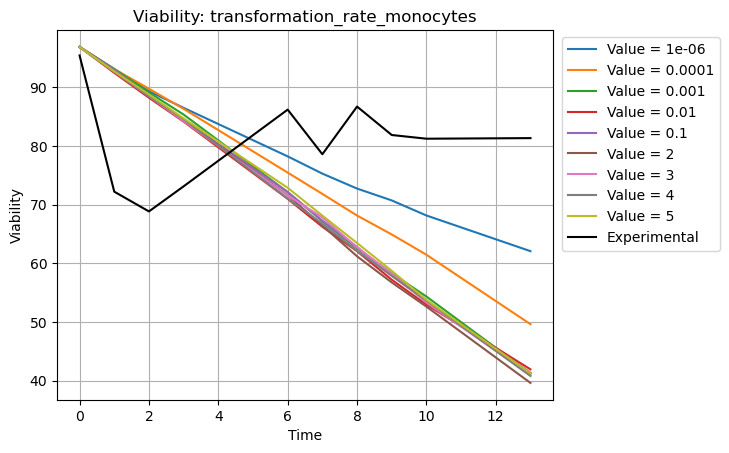

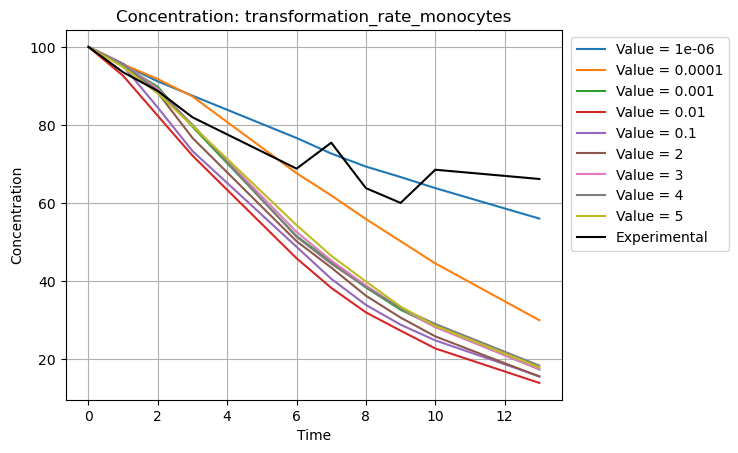

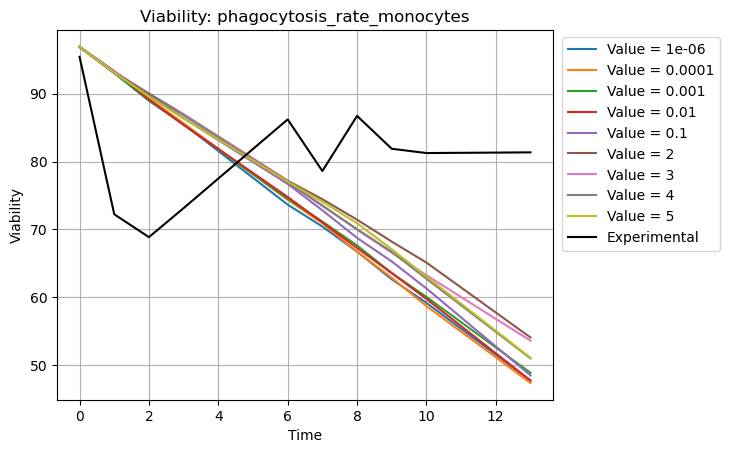

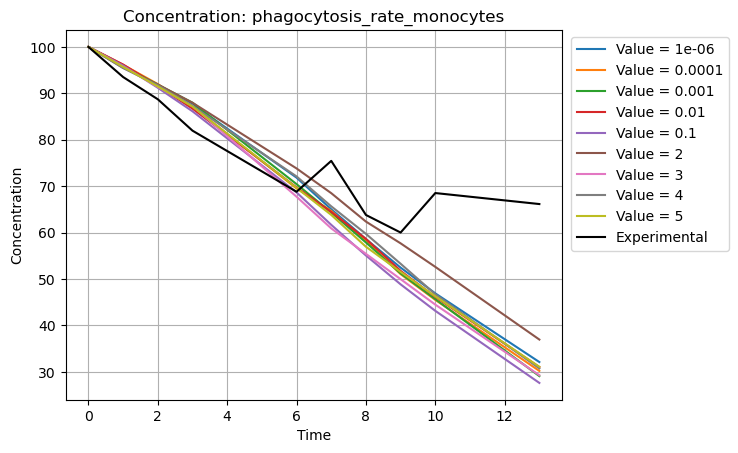

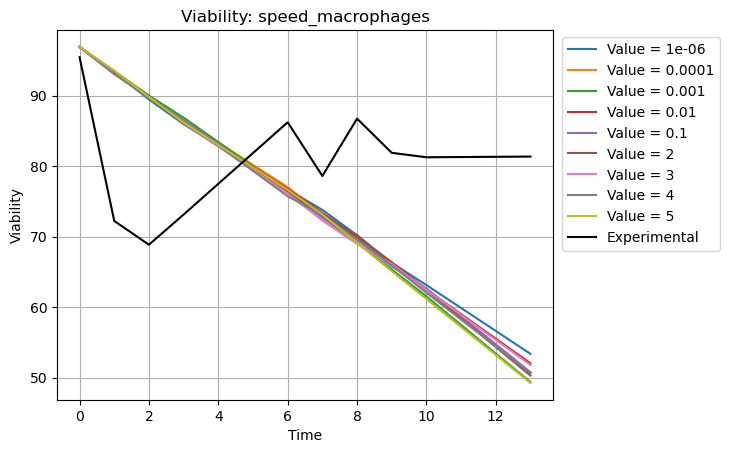

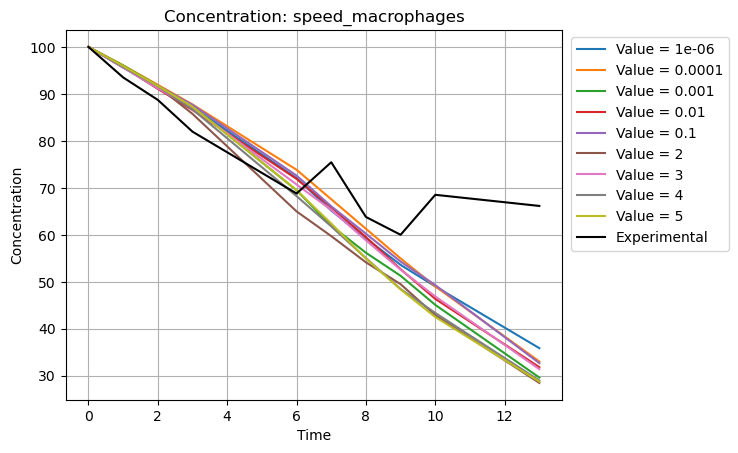

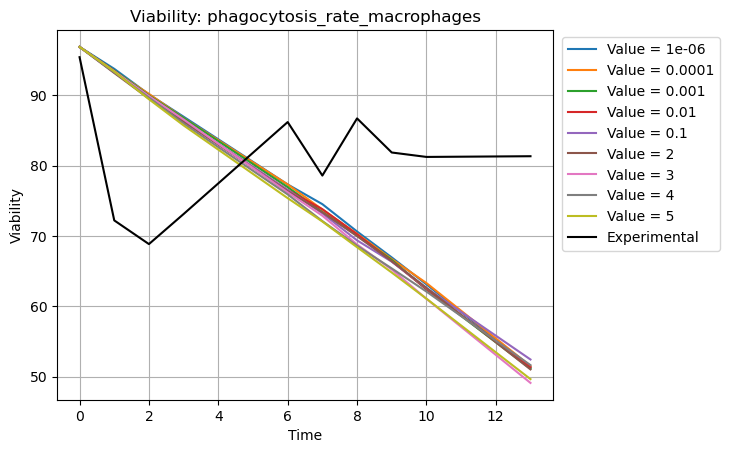

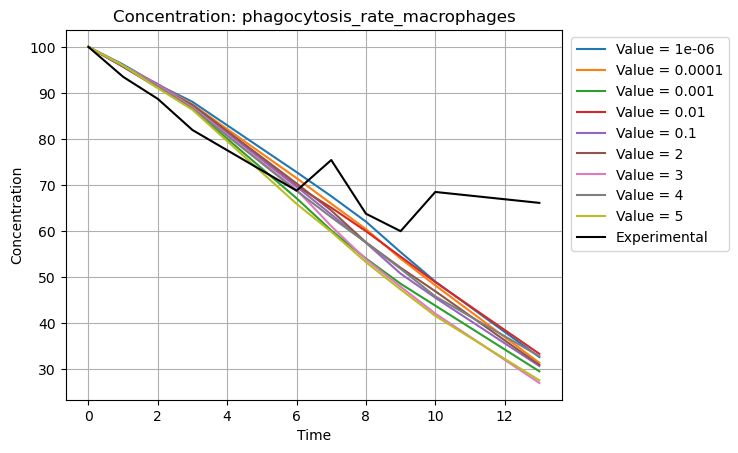

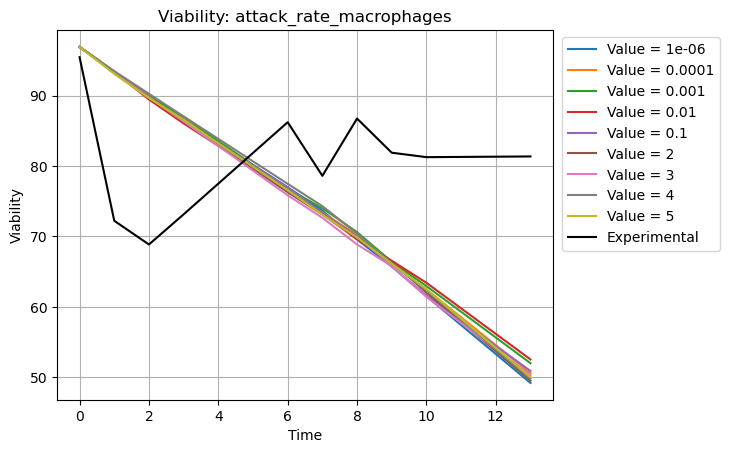

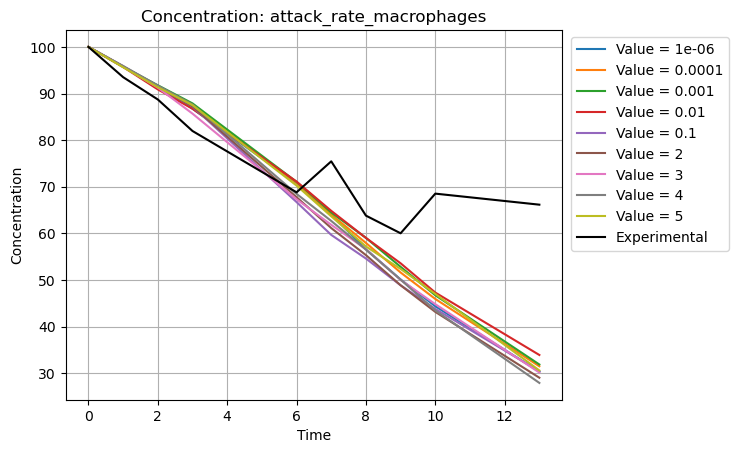

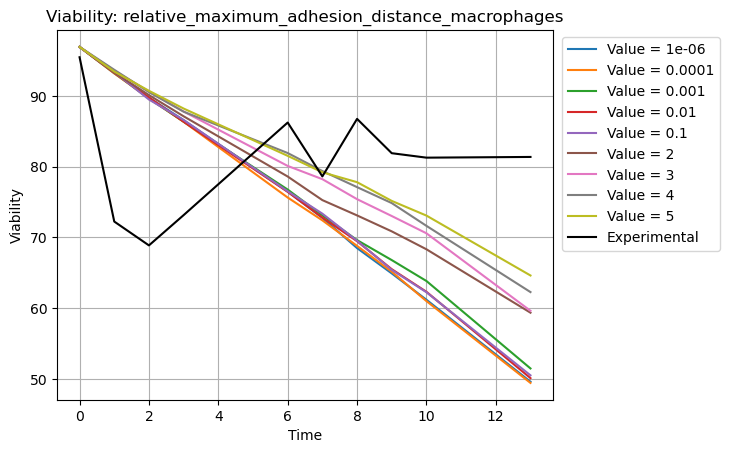

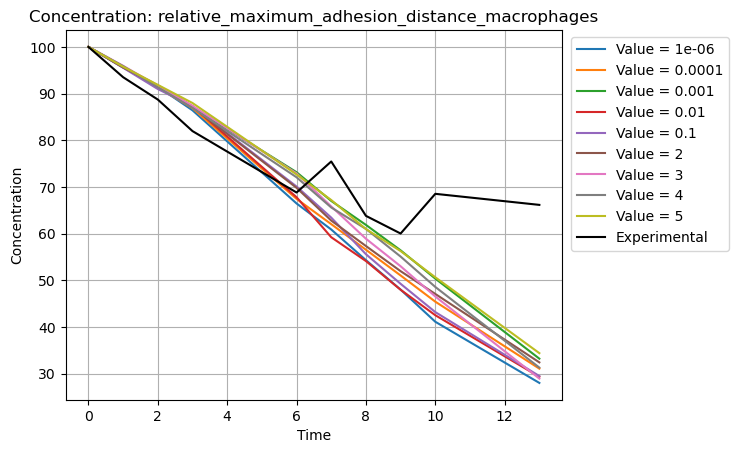

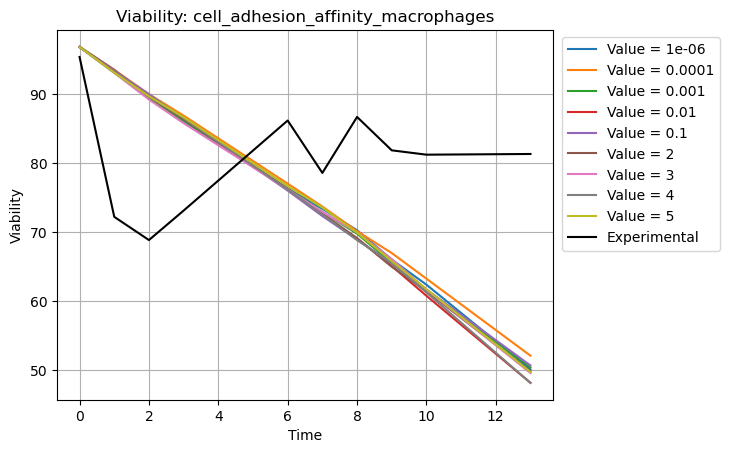

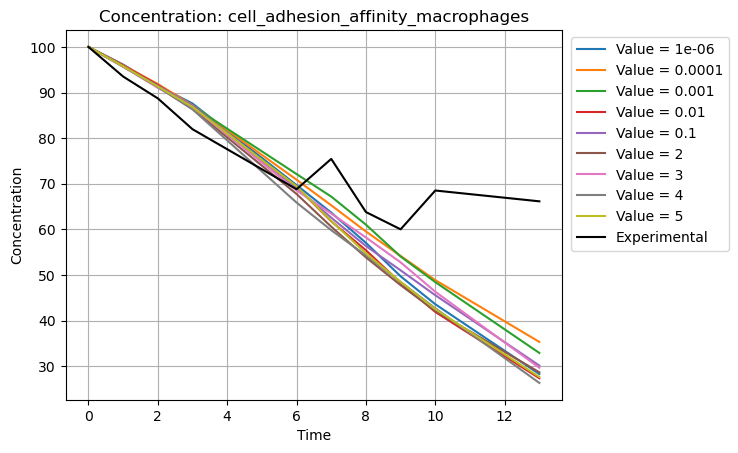

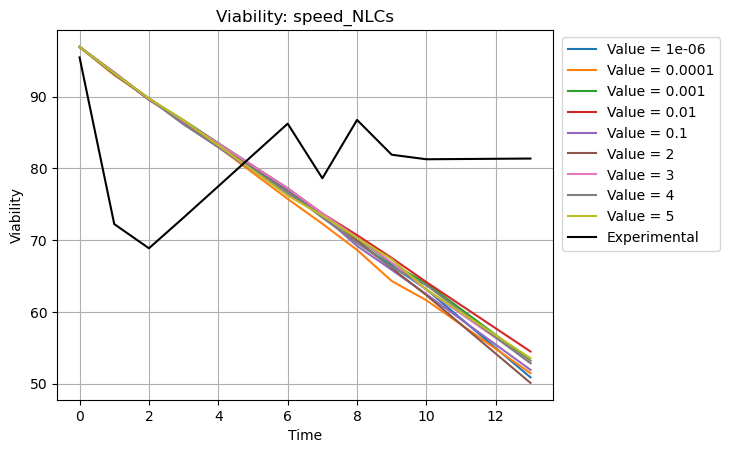

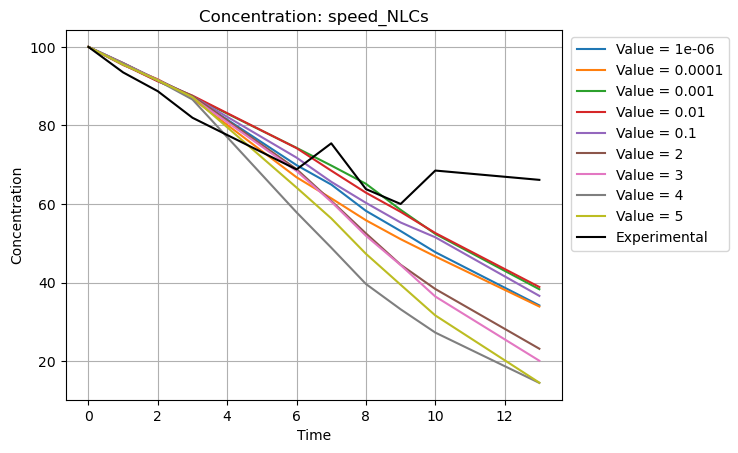

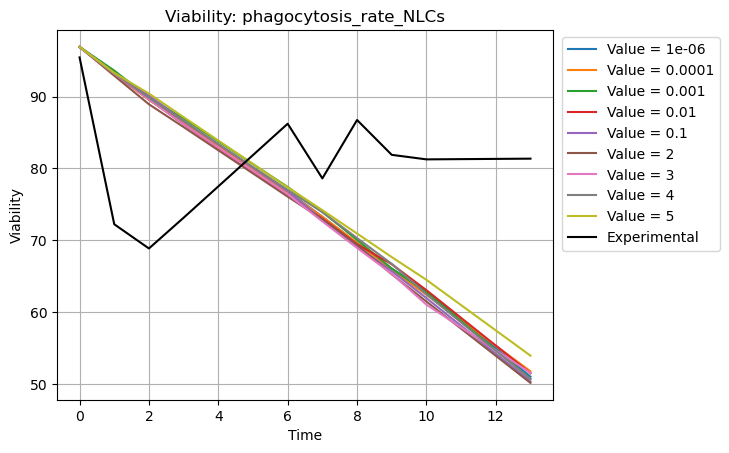

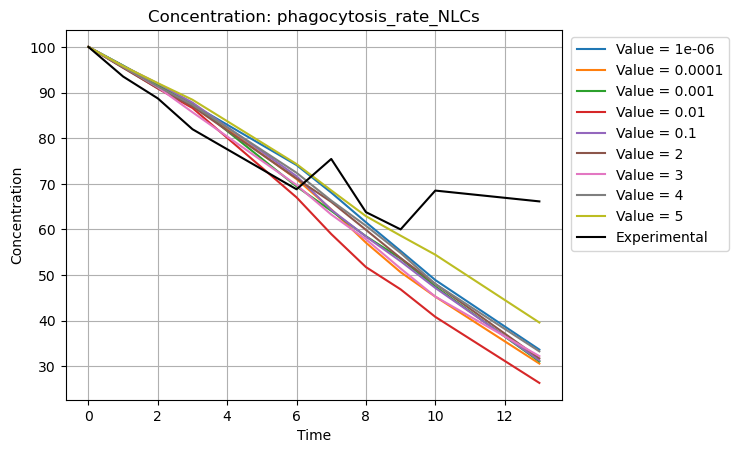

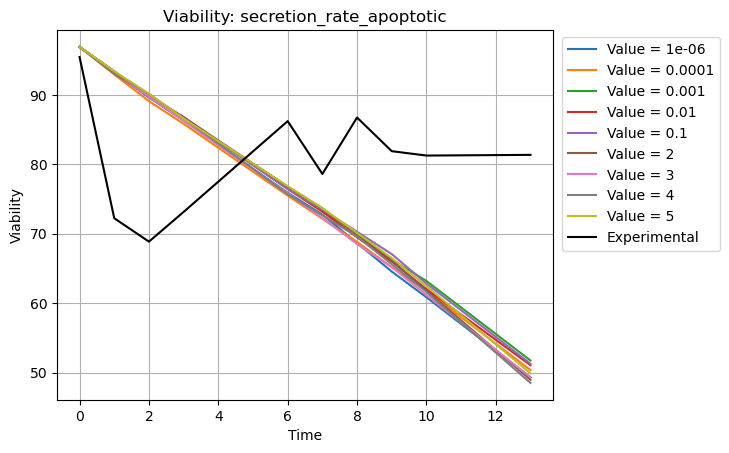

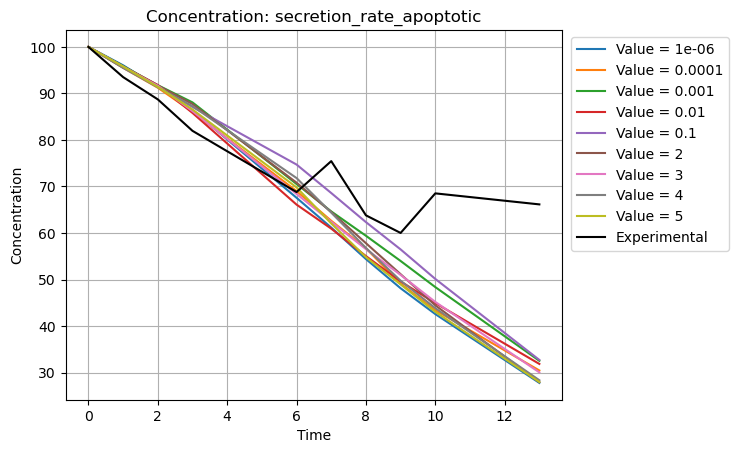

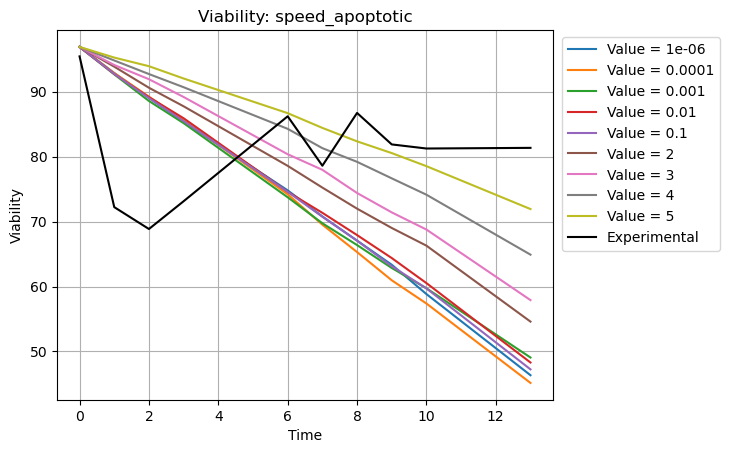

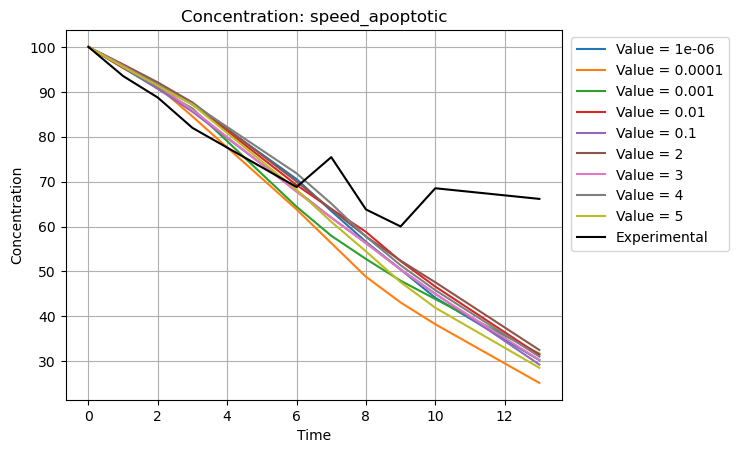

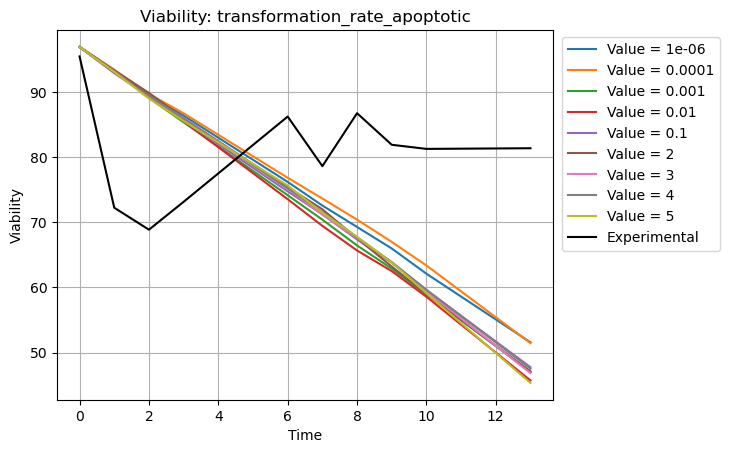

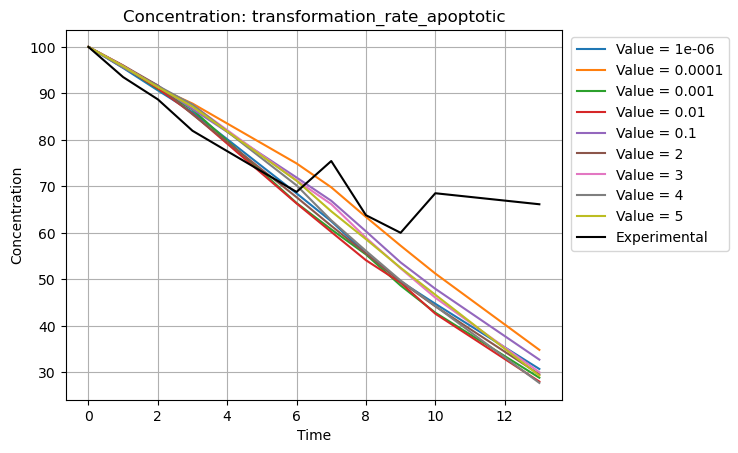

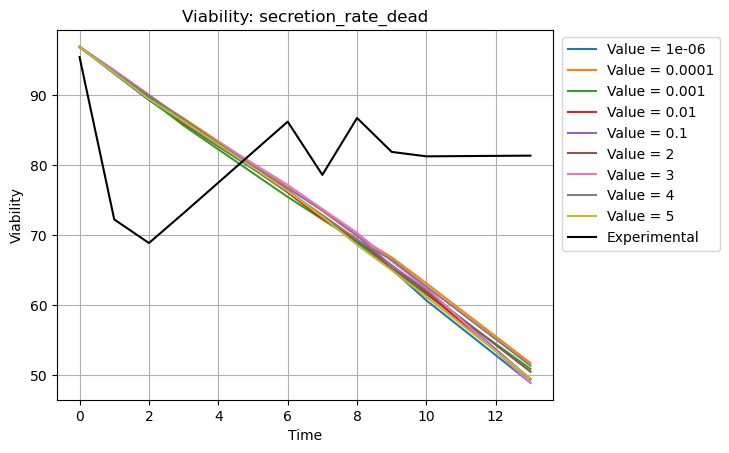

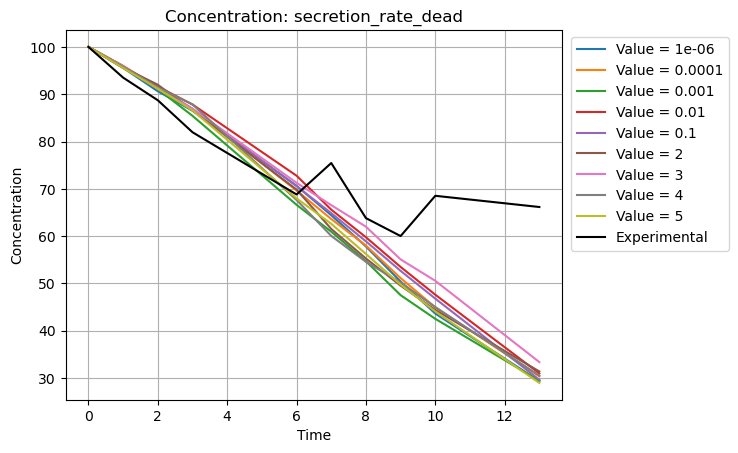

In [5]:
contador = 0
for k in range(0, viability_data.shape[1], len(vals)):
    
    viability = viability_data.iloc[:,k:k+ len(vals)]
    concentration = concentration_data.iloc[:,k:k+ len(vals)]

    ###Viability
    for i in range(viability.shape[1]): # Iterate over each column of the matrix
        plt.plot(time_points, viability.iloc[:, i], label=f'Value = {vals[i]}')

    plt.plot(time_points, viability_exp, label='Experimental', color = 'black')
    plt.xlabel('Time')
    plt.ylabel('Viability')
    plt.title(f'Viability: {param_names[contador]}')
    plt.legend(loc='upper right', bbox_to_anchor=(1.35, 1))

    plt.grid(True)
    plt.show()

    ###Concentration
    for i in range(concentration.shape[1]):
        plt.plot(time_points, concentration.iloc[:, i], label=f'Value = {vals[i]}')

    plt.plot(time_points, concentration_exp, label='Experimental', color = 'black')
    plt.xlabel('Time')
    plt.ylabel('Concentration')
    plt.title(f'Concentration: {param_names[contador]}')
    plt.legend(loc='upper right', bbox_to_anchor=(1.35, 1))

    plt.grid(True)
    plt.show()
    
    contador = contador + 1